forward/back propagation calculations https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c

Vanishing gradient example: https://github.com/harinisuresh/VanishingGradient/blob/master/Vanishing%20Gradient%20Example.ipynb

https://adventuresinmachinelearning.com/vanishing-gradient-problem-tensorflow/

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

%matplotlib inline

# Visualizing and understanding vanishing gradients

Make sure you understand well the backpropagation algorithm. You may perform by hand the calculations as illustrated [here](https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c) to consolidate your understanding.

We will be using three activation functions. Observe under which what values each function's gradient becomes negligible (very near zero)



### sigmoid

$$\text{sigm(z)} = \frac{1}{1-e^{-z}}$$

$$\frac{\partial \;\text{sigm}}{\partial \; z} = \text{sigm}(z)(1-\text{sigm}(z))$$


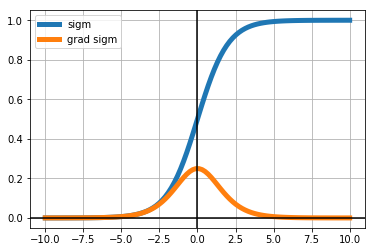

In [46]:
z = np.linspace(-10,10,100)

sigm = lambda z: 1/(1+np.exp(-z))

dsigm = lambda z: sigm(z)*(1-sigm(z))

plt.plot(z, sigm(z), lw=5, label="sigm")
plt.plot(z, dsigm(z), lw=5, label="grad sigm")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### tanh

$$\text{tanh(z)} = \frac{e^z - e^{-z}}{e^z-e^{-z}}$$

$$\frac{\partial \;\text{tanh}}{\partial \; z} = 1-\text{tanh}(z)^2$$


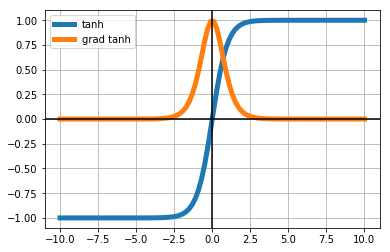

In [47]:
z = np.linspace(-10,10,100)

tanh = lambda z: (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

dtanh = lambda z: 1 - tanh(z)**2

plt.plot(z, tanh(z), lw=5, label="tanh")
plt.plot(z, dtanh(z), lw=5, label="grad tanh")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### ReLU (Rectified Linear Unit)

$$\text{relu}(z) = \text{z if }z<0\;;\;0\text{ otherwise}$$

$$\frac{\partial \;\text{relu}}{\partial \; z} = \text{1 if }z<0\;;\;0\text{ otherwise}$$


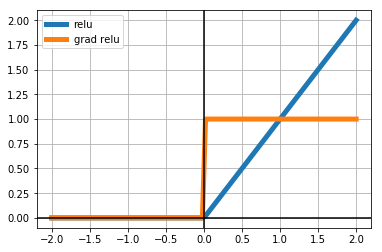

In [43]:
z = np.linspace(-2,2,100)

relu = np.vectorize(lambda z: z if z>0 else 0.)

drelu = np.vectorize(lambda z: 1 if z>0 else 0.)

plt.plot(z, relu(z), lw=5, label="relu")
plt.plot(z, drelu(z), lw=5, label="grad relu")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### Leaky ReLU (Rectified Linear Unit)

$$\text{relu}(z) = \text{z if }z<0\;;\;kz\text{ otherwise with }k<<1$$

$$\frac{\partial \;\text{relu}}{\partial \; z} = \text{1 if }z<0\;;\;k\text{ otherwise}$$


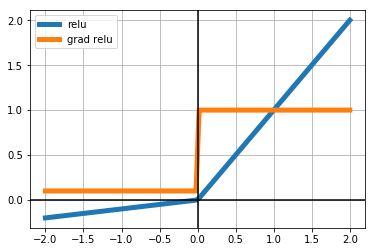

In [42]:
z = np.linspace(-2,2,100)

relu = np.vectorize(lambda z: z if z>0 else .1*z)

drelu = np.vectorize(lambda z: 1 if z>0 else .1)

plt.plot(z, relu(z), lw=5, label="relu")
plt.plot(z, drelu(z), lw=5, label="grad relu")
plt.grid(); 
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### load sample MNIST data as customary

In [2]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = X_train
X_test  = X_test
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print X_train.shape, y_train_oh.shape

(1200, 784) (1200, 10)


In [4]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras


### A basic multi layered dense model

observe that the function allows us to parametrize the number of hidden layers and their activation function


In [9]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

### SIGMOID activation

In [15]:
model = get_model(num_hidden_layers=10, activation="sigmoid")
!rm -rf log/sigmoid
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3563 - acc: 0.0967 - val_loss: 2.2991 - val_acc: 0.1400
Epoch 2/30
1200/1200 [==============================] - 0s 126us/step - loss: 2.3260 - acc: 0.1200 - val_loss: 2.2935 - val_acc: 0.1400
Epoch 3/30
1200/1200 [==============================] - 0s 119us/step - loss: 2.3124 - acc: 0.1200 - val_loss: 2.2940 - val_acc: 0.1400
Epoch 4/30
1200/1200 [==============================] - 0s 139us/step - loss: 2.3061 - acc: 0.1200 - val_loss: 2.2962 - val_acc: 0.1400
Epoch 5/30
1200/1200 [==============================] - 0s 257us/step - loss: 2.3022 - acc: 0.1200 - val_loss: 2.2955 - val_acc: 0.1400
Epoch 6/30
1200/1200 [==============================] - 0s 188us/step - loss: 2.3007 - acc: 0.1200 - val_loss: 2.2968 - val_acc: 0.1400
Epoch 7/30
1200/1200 [==============================] - 0s 275us/step - loss: 2.2997 - acc: 0.1200 - val_loss: 2.3003 - val_acc: 0.1400
Epo

### RELU activation

In [16]:
model = get_model(num_hidden_layers=10, activation="relu")
!rm -rf log/relu
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/relu', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 2s 2ms/step - loss: 2.2986 - acc: 0.0942 - val_loss: 2.2812 - val_acc: 0.1100
Epoch 2/30
1200/1200 [==============================] - 0s 284us/step - loss: 2.2241 - acc: 0.1267 - val_loss: 2.1586 - val_acc: 0.2200
Epoch 3/30
1200/1200 [==============================] - 0s 252us/step - loss: 2.1055 - acc: 0.1817 - val_loss: 2.0695 - val_acc: 0.1333
Epoch 4/30
1200/1200 [==============================] - 0s 254us/step - loss: 2.0283 - acc: 0.1992 - val_loss: 2.0017 - val_acc: 0.1500
Epoch 5/30
1200/1200 [==============================] - 0s 190us/step - loss: 1.9664 - acc: 0.2150 - val_loss: 1.9523 - val_acc: 0.2100
Epoch 6/30
1200/1200 [==============================] - 0s 212us/step - loss: 1.9063 - acc: 0.2383 - val_loss: 1.9524 - val_acc: 0.1633
Epoch 7/30
1200/1200 [==============================] - 0s 191us/step - loss: 1.8416 - acc: 0.2717 - val_loss: 1.8616 - val_acc: 0.2100
Epo

### Leaky RELU activation

In [17]:
import tensorflow as tf
model = get_model(num_hidden_layers=10, activation=tf.nn.leaky_relu)
!rm -rf log/leaky_relu
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/leaky_relu', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 2s 2ms/step - loss: 2.2889 - acc: 0.1417 - val_loss: 2.2394 - val_acc: 0.2200
Epoch 2/30
1200/1200 [==============================] - 0s 149us/step - loss: 2.1066 - acc: 0.2825 - val_loss: 2.0047 - val_acc: 0.3033
Epoch 3/30
1200/1200 [==============================] - 0s 131us/step - loss: 1.8978 - acc: 0.3375 - val_loss: 1.7592 - val_acc: 0.4333
Epoch 4/30
1200/1200 [==============================] - 0s 173us/step - loss: 1.6423 - acc: 0.4183 - val_loss: 1.5743 - val_acc: 0.4367
Epoch 5/30
1200/1200 [==============================] - 0s 317us/step - loss: 1.4479 - acc: 0.4625 - val_loss: 1.4613 - val_acc: 0.4967
Epoch 6/30
1200/1200 [==============================] - 0s 231us/step - loss: 1.3017 - acc: 0.5275 - val_loss: 1.4101 - val_acc: 0.4733
Epoch 7/30
1200/1200 [==============================] - 0s 240us/step - loss: 1.1999 - acc: 0.5625 - val_loss: 1.3473 - val_acc: 0.4833
Epo

### SIGMOID activation but longer run (epochs)

In [18]:
model = get_model(num_hidden_layers=10, activation="sigmoid")
!rm -rf log/sigmoid_longrun
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid_longrun', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=300, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Train on 1200 samples, validate on 300 samples
Epoch 1/300
1200/1200 [==============================] - 3s 3ms/step - loss: 2.4376 - acc: 0.0917 - val_loss: 2.3625 - val_acc: 0.1033
Epoch 2/300
1200/1200 [==============================] - 0s 246us/step - loss: 2.3689 - acc: 0.0917 - val_loss: 2.3261 - val_acc: 0.1033
Epoch 3/300
1200/1200 [==============================] - 0s 208us/step - loss: 2.3348 - acc: 0.0917 - val_loss: 2.3091 - val_acc: 0.1033
Epoch 4/300
1200/1200 [==============================] - 0s 231us/step - loss: 2.3175 - acc: 0.0917 - val_loss: 2.3016 - val_acc: 0.1033
Epoch 5/300
1200/1200 [==============================] - 0s 206us/step - loss: 2.3085 - acc: 0.0917 - val_loss: 2.2995 - val_acc: 0.1033
Epoch 6/300
1200/1200 [==============================] - 0s 216us/step - loss: 2.3040 - acc: 0.1167 - val_loss: 2.2991 - val_acc: 0.1400
Epoch 7/300
1200/1200 [==============================] - 0s 200us/step - loss: 2.3017 - acc: 0.1200 - val_loss: 2.2981 - val_acc: 0.1

1200/1200 [==============================] - 0s 233us/step - loss: 1.9041 - acc: 0.2050 - val_loss: 1.9918 - val_acc: 0.1500
Epoch 120/300
1200/1200 [==============================] - 0s 286us/step - loss: 1.8963 - acc: 0.2067 - val_loss: 1.9797 - val_acc: 0.1567
Epoch 121/300
1200/1200 [==============================] - 0s 234us/step - loss: 1.9005 - acc: 0.2075 - val_loss: 1.9956 - val_acc: 0.1567
Epoch 122/300
1200/1200 [==============================] - 0s 254us/step - loss: 1.9020 - acc: 0.2092 - val_loss: 1.9791 - val_acc: 0.1533
Epoch 123/300
1200/1200 [==============================] - 0s 263us/step - loss: 1.9000 - acc: 0.2050 - val_loss: 1.9944 - val_acc: 0.1467
Epoch 124/300
1200/1200 [==============================] - 0s 229us/step - loss: 1.8970 - acc: 0.2050 - val_loss: 1.9922 - val_acc: 0.1467
Epoch 125/300
1200/1200 [==============================] - 0s 236us/step - loss: 1.8947 - acc: 0.2058 - val_loss: 1.9907 - val_acc: 0.1467
Epoch 126/300
1200/1200 [================

1200/1200 [==============================] - 0s 239us/step - loss: 1.8626 - acc: 0.2108 - val_loss: 1.9844 - val_acc: 0.1600
Epoch 179/300
1200/1200 [==============================] - 0s 227us/step - loss: 1.8620 - acc: 0.2108 - val_loss: 1.9808 - val_acc: 0.1600
Epoch 180/300
1200/1200 [==============================] - 0s 246us/step - loss: 1.8780 - acc: 0.2092 - val_loss: 2.0143 - val_acc: 0.1533
Epoch 181/300
1200/1200 [==============================] - 0s 248us/step - loss: 1.8736 - acc: 0.2092 - val_loss: 2.0161 - val_acc: 0.1533
Epoch 182/300
1200/1200 [==============================] - 0s 249us/step - loss: 1.8663 - acc: 0.2108 - val_loss: 2.0011 - val_acc: 0.1567
Epoch 183/300
1200/1200 [==============================] - 0s 242us/step - loss: 1.8773 - acc: 0.2100 - val_loss: 2.0013 - val_acc: 0.1567
Epoch 184/300
1200/1200 [==============================] - ETA: 0s - loss: 1.8841 - acc: 0.214 - 0s 217us/step - loss: 1.8772 - acc: 0.2100 - val_loss: 1.9988 - val_acc: 0.1567
Epo

Epoch 237/300
1200/1200 [==============================] - 0s 228us/step - loss: 1.8724 - acc: 0.2100 - val_loss: 2.0136 - val_acc: 0.1600
Epoch 238/300
1200/1200 [==============================] - 0s 226us/step - loss: 1.8676 - acc: 0.2100 - val_loss: 2.0298 - val_acc: 0.1533
Epoch 239/300
1200/1200 [==============================] - 0s 264us/step - loss: 1.8736 - acc: 0.2108 - val_loss: 2.0413 - val_acc: 0.1567
Epoch 240/300
1200/1200 [==============================] - 0s 231us/step - loss: 1.8571 - acc: 0.2108 - val_loss: 1.9973 - val_acc: 0.1600
Epoch 241/300
1200/1200 [==============================] - 0s 232us/step - loss: 1.8567 - acc: 0.2108 - val_loss: 2.0392 - val_acc: 0.1567
Epoch 242/300
1200/1200 [==============================] - 0s 245us/step - loss: 1.8654 - acc: 0.2108 - val_loss: 1.9802 - val_acc: 0.1600
Epoch 243/300
1200/1200 [==============================] - 0s 235us/step - loss: 1.8573 - acc: 0.2108 - val_loss: 2.0129 - val_acc: 0.1567
Epoch 244/300
1200/1200 [==

Epoch 296/300
1200/1200 [==============================] - 0s 270us/step - loss: 1.8378 - acc: 0.2108 - val_loss: 1.9923 - val_acc: 0.1567
Epoch 297/300
1200/1200 [==============================] - 0s 274us/step - loss: 1.8405 - acc: 0.2100 - val_loss: 1.9958 - val_acc: 0.1533
Epoch 298/300
1200/1200 [==============================] - 0s 267us/step - loss: 1.8380 - acc: 0.2108 - val_loss: 1.9960 - val_acc: 0.1533
Epoch 299/300
1200/1200 [==============================] - 0s 262us/step - loss: 1.8369 - acc: 0.2100 - val_loss: 1.9928 - val_acc: 0.1533
Epoch 300/300
1200/1200 [==============================] - 0s 284us/step - loss: 1.8379 - acc: 0.2100 - val_loss: 1.9940 - val_acc: 0.1533


## Experiment observations

- What is the distribution of the gradients observed as we move from the output layer to the input layer for each experiment? 



- Look in [Tensorboard](http://localhost:6006) at distributions or histograms charts named `Layer_00_Input/kernel_0_grad`, `Layer_01_Hidden/kernel_0_grad`, etc. for different layers. You should see:
    - Gradients are usually higher at the output layer and tend to decrease as you move backwards in the network.
    - With sigmoid activations gradients are always low and rapidly decay from the output layer all the way to the input layer.
    - Relu might still have some vanishing gradient when weights are <0.
    - Leaky Relu would probably have constant gradients across layers.
    

- Do you think the sigmoid longrun would reach levels comparable to Relu or Leaky Relu? At what computational cost?
